In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
. Na #Features = pd.read_csv("/content/gdrive/My Drive/Magisterka/features.csv")

In [ ]:
!unzip "features_train.zip"

Archive:  features_train.zip
  inflating: features_train.csv      


In [ ]:
!unzip "features_val.zip"

Archive:  features_val.zip
  inflating: features_val.csv        


In [ ]:
Features_train = pd.read_csv("features_train.csv")
Features_test = pd.read_csv("features_val.csv")

In [ ]:
X_train = Features_train.iloc[: ,:-1].values
Y_train = Features_train['labels'].values

X_test = Features_test.iloc[: ,:-1].values
Y_test = Features_test['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(Y_train).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(Y_test).reshape(-1,1)).toarray()

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48342, 165), (48342, 6), (3453, 165), (3453, 6))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48342, 165, 1), (48342, 6), (3453, 165, 1), (3453, 6))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 165, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 83, 256)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 83, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 83, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 42, 128)          

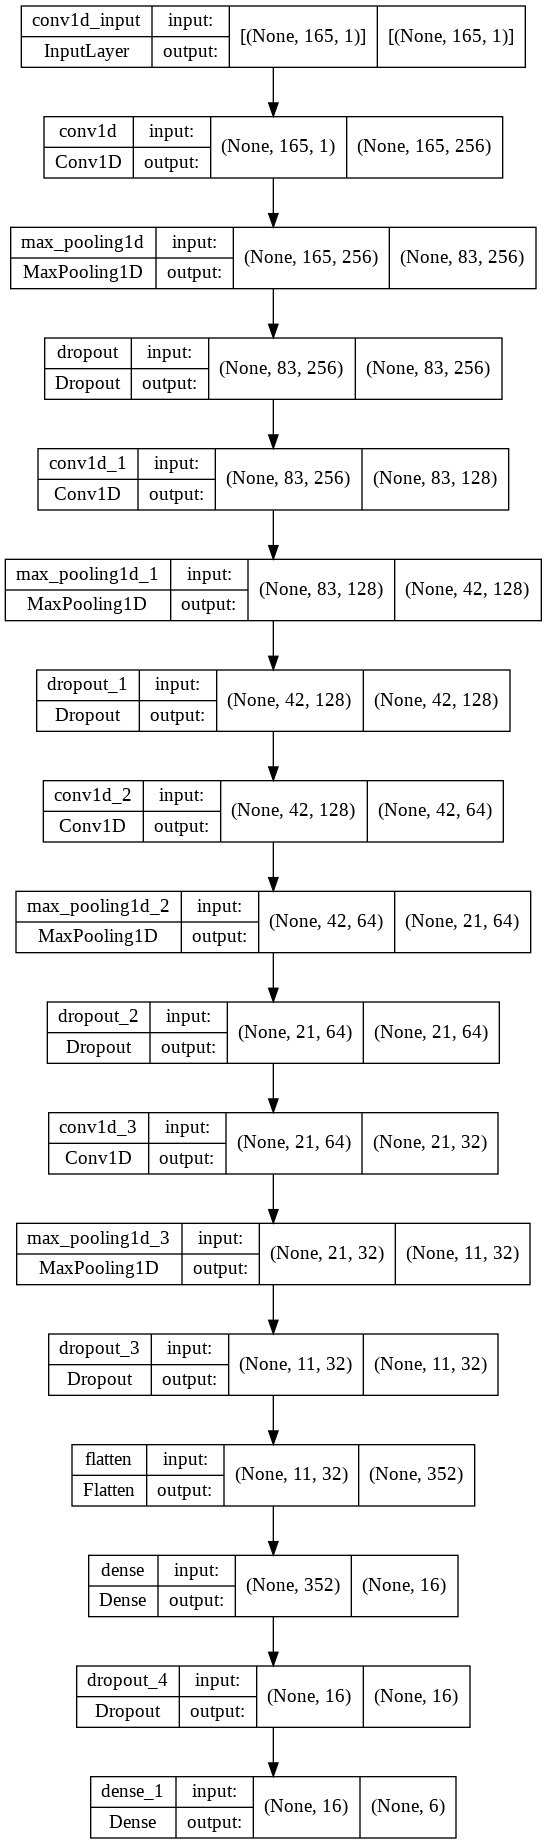

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
epoki = 70
rlrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, verbose=0, mode='auto', patience=3, min_lr=0.00000001)
history = model.fit(x_train, y_train, batch_size=128, epochs=epoki, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/70
378/378 [==============================] - 5s 10ms/step - loss: 1.6579 - accuracy: 0.2782 - val_loss: 1.4600 - val_accuracy: 0.4092 - lr: 0.0010
Epoch 2/70
378/378 [==============================] - 3s 9ms/step - loss: 1.4967 - accuracy: 0.3640 - val_loss: 1.3662 - val_accuracy: 0.4506 - lr: 0.0010
Epoch 3/70
378/378 [==============================] - 3s 9ms/step - loss: 1.4227 - accuracy: 0.4035 - val_loss: 1.2882 - val_accuracy: 0.4758 - lr: 0.0010
Epoch 4/70
378/378 [==============================] - 3s 9ms/step - loss: 1.3748 - accuracy: 0.4264 - val_loss: 1.2611 - val_accuracy: 0.4906 - lr: 0.0010
Epoch 5/70
378/378 [==============================] - 3s 9ms/step - loss: 1.3420 - accuracy: 0.4394 - val_loss: 1.2238 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 6/70
378/378 [==============================] - 3s 9ms/step - loss: 1.3134 - accuracy: 0.4503 - val_loss: 1.1921 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 7/70
378/378 [==============================] - 3s 9ms/step - l

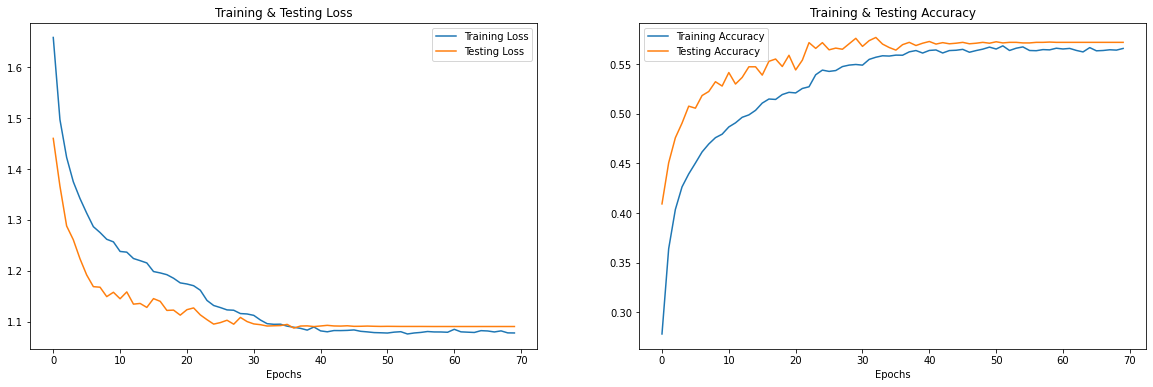

In [ ]:
#print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(epoki)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,angry,angry
2,neutral,happy
3,sad,fear
4,disgust,disgust
5,sad,disgust
6,neutral,neutral
7,happy,happy
8,neutral,sad
9,disgust,sad


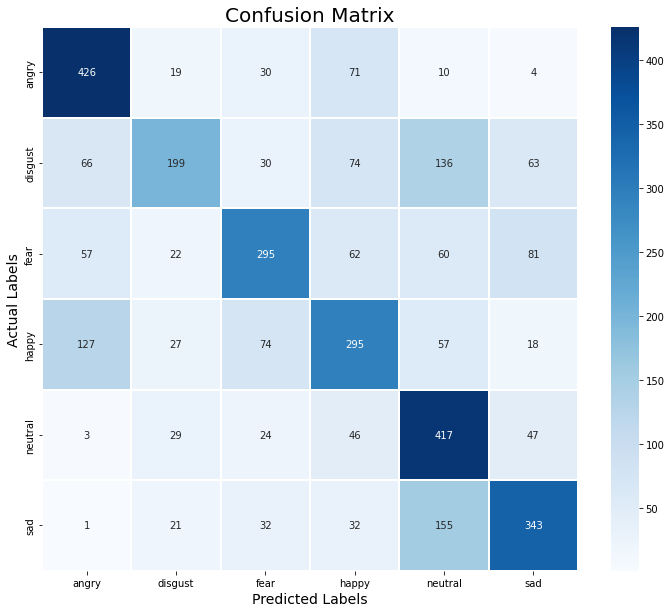

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.63      0.76      0.69       560
     disgust       0.63      0.35      0.45       568
        fear       0.61      0.51      0.56       577
       happy       0.51      0.49      0.50       598
     neutral       0.50      0.74      0.60       566
         sad       0.62      0.59      0.60       584

    accuracy                           0.57      3453
   macro avg       0.58      0.57      0.57      3453
weighted avg       0.58      0.57      0.56      3453

